# Various working examples of autoencoders

Ref: [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

/Users/sushantmore/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#the size of the encoded representation
encodingDim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# placeholder for the input image
inputImg = Input(shape=(784,))

"encoded" is the encoded representation of the input

In [4]:
encoded = Dense(encodingDim, activation='relu')(inputImg)

In [5]:
decoded = Dense(784, activation='sigmoid')(encoded)

Try another network with the relu activation function in the decoder and check the performance. 

In [7]:
autoencoder = Model(inputImg, decoded)

In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
785 * 32

25120

In [10]:
33 * 784

25872

In [11]:
type(autoencoder)

keras.engine.training.Model

Let's build the same network using the Sequential class of keras. 

In [26]:
autoencoderSeq = Sequential()

In [27]:
autoencoderSeq.add(Dense(encodingDim, input_shape=(784,), activation='relu'))

In [28]:
autoencoderSeq.add(Dense(784, activation='sigmoid'))

In [29]:
autoencoderSeq.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [30]:
type(autoencoderSeq)

keras.models.Sequential

Now, let's train the network to reconstruct MNIST digits

In [31]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [32]:
autoencoderSeq.compile(optimizer='adadelta', loss='binary_crossentropy')

In [33]:
from keras.datasets import mnist
import numpy as np

In [34]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [35]:
Xtrain.shape

(60000, 28, 28)

In [36]:
Xtest.shape

(10000, 28, 28)

In [37]:
ytest.shape

(10000,)

In [38]:
XtrainScaled = Xtrain.astype('float32') / 255.

In [39]:
XtestScaled = Xtest.astype('float32') / 255.

Can think of the above as MaxAbsScaler

In [40]:
import numpy as np

In [42]:
np.prod(XtrainScaled.shape[1:])

784

In [43]:
XtrainScaledFlatten = XtrainScaled.reshape((len(XtrainScaled), np.prod(XtrainScaled.shape[1:])))

In [44]:
XtestScaledFlatten = XtestScaled.reshape((len(XtestScaled), np.prod(XtestScaled.shape[1:])))

In [47]:
XtrainScaledFlatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Training the autoencoder

In [57]:
history = autoencoder.fit(XtrainScaledFlatten, XtrainScaledFlatten, epochs=200, 
                          batch_size=256, shuffle=True, verbose=1, validation_data=(XtestScaledFlatten, XtestScaledFlatten)).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0940 - val_loss: 0.0927
Epoch 2/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0940 - val_loss: 0.0926
Epoch 3/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0940 - val_loss: 0.0927
Epoch 4/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0940 - val_loss: 0.0926
Epoch 5/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0940 - val_loss: 0.0926
Epoch 6/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0939 - val_loss: 0.0926
Epoch 7/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0939 - val_loss: 0.0926
Epoch 8/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0939 - val_loss: 0.0926
Epoch 9/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.0939 - val_loss: 0.0

Epoch 77/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 78/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0934 - val_loss: 0.0922
Epoch 79/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.0934 - val_loss: 0.0922
Epoch 80/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0934 - val_loss: 0.0922
Epoch 81/200
60000/60000 [==============================] - 2s 29us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 82/200
60000/60000 [==============================] - 2s 29us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 83/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 84/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 85/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 86/200
60000/60000 [===========

60000/60000 [==============================] - 2s 36us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 154/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 155/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 156/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 157/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 158/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 159/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 160/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 161/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 162/200
60000/60000 [===============

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

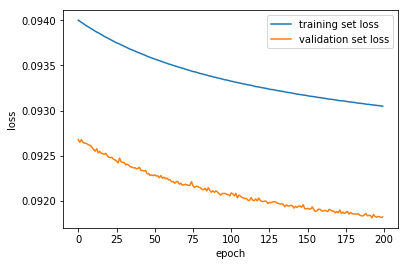

In [59]:
plt.plot(history['loss']);
plt.plot(history['val_loss']);
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set loss', 'validation set loss']);